In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
df=pd.read_csv("C:/Users/Shetty/OneDrive/Desktop/NYU/Independent Study/NREL/MapPLUTO/pluto_22v3.csv")
df.head()

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,sanitboro,sanitdistrict,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,MN,574,65,102.0,1006300.0,1.006300e+10,63.0,2001.0,2.0,3.0,10011.0,E033,6.0,15.0,5700.0,1.0,2.0,3A,41 WEST 10 STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,C6,2.0,0.0,NaN,UNAVAILABLE OWNER,2321.0,6540.0,0.0,6540.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,5.0,5.0,24.5,94.75,25.0,80.00,E,3.0,N,5.0,1.0,567000.0,2223000.0,0.0,1839.0,1989.0,0.0,Greenwich Village Historic District,NaN,2.82,2.43,0.0,4.8,1,1.005740e+09,NaN,63.0,984990.0,206856.0,12c,NaN,103 019,10207.0,NaN,NaN,NaN,1,NaN,NaN,22v3,t,40.734448,-73.997330,NaN
1,BK,3435,45,304.0,3041100.0,3.041100e+10,411.0,1000.0,32.0,37.0,11207.0,Q252,83.0,34.0,3500.0,3.0,4.0,3B,177 COOPER STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B2,1.0,0.0,NaN,"WASHINGTON, TIFFANIE L",2000.0,1800.0,0.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,20.0,100.00,20.0,45.00,N,3.0,N,5.0,2.0,12300.0,74940.0,1460.0,1901.0,0.0,0.0,NaN,NaN,0.90,2.43,0.0,4.8,3,3.034350e+09,NaN,411.0,1010129.0,190246.0,17c,NaN,309 021,31109.0,NaN,NaN,NaN,1,NaN,NaN,22v3,NaN,40.688820,-73.906684,NaN
2,BK,3447,29,304.0,3041100.0,3.041100e+10,411.0,1002.0,32.0,37.0,11207.0,Q252,83.0,34.0,3500.0,3.0,4.0,3B,222 MOFFAT STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B1,1.0,0.0,NaN,JDC HOME INC.,2000.0,2200.0,0.0,2200.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,20.0,100.00,20.0,55.00,N,3.0,N,5.0,2.0,11940.0,75780.0,0.0,1910.0,0.0,0.0,NaN,NaN,1.10,0.00,1.0,2.4,3,3.034470e+09,NaN,411.0,1010530.0,190085.0,17c,NaN,309 021,31109.0,NaN,NaN,NaN,1,NaN,NaN,22v3,NaN,40.688377,-73.905239,NaN
3,BX,2514,10,204.0,2019300.0,2.019300e+10,193.0,4001.0,9.0,8.0,10452.0,E068,44.0,23.0,3310.0,2.0,4.0,2A,1082 OGDEN AVENUE,R7-1,NaN,NaN,NaN,C1-4,NaN,NaN,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,"PINEDA, ARELIS",2875.0,1710.0,0.0,1710.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,25.0,115.00,19.0,42.67,N,1.0,N,5.0,2.0,14340.0,34560.0,0.0,1899.0,0.0,0.0,NaN,NaN,0.59,3.44,0.0,4.8,2,2.025140e+09,NaN,193.0,1004213.0,243491.0,3b,NaN,210S041,20908.0,NaN,NaN,NaN,1,NaN,NaN,22v3,NaN,40.834979,-73.927858,NaN
4,MN,482,7501,102.0,1004500.0,1.004500e+10,45.0,1006.0,2.0,1.0,10013.0,E055,5.0,15.0,6800.0,1.0,2.0,1A,406 BROOME STREET,C6-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,RB,5.0,0.0,NaN,LAFAYETTE COMMERCL CONDO,11750.0,74349.0,74349.0,0.0,9849.0,64500.0,0.0,0.0,0.0,0.0,2.0,1.0,7.0,0.0,25.0,149.5,100.42,0.0,0.00,NaN,0.0,Y,5.0,5.0,1143002.0,6811650.0,0.0,1900.0,0.0,0.0,SoHo-Cast Iron Historic District Extension,NaN,6.33,6.02,6.0,6.5,1,1.004828e+09,463.0,45.0,984876.0,202030.0,12c,NaN,101N073,10206.0,E-130,1.004821e+09,08/25/1988,1,NaN,NaN,22v3,NaN,40.721202,-73.997742,NaN


In [6]:
df.shape

(858619, 92)

In [7]:
df = df.dropna(subset=['bldgarea','unitstotal'])

In [8]:
df=df[(df['bldgarea']>0) & (df['unitstotal']>0)]

In [9]:
df['borough'].value_counts()

QN    310388
BK    264267
SI    115160
BX     82778
MN     40151
Name: borough, dtype: int64

#### Columns to be considered
- borough
- cd
- landuse
- unitstotal

In [10]:
df["unit.sqft"]=df["bldgarea"]/df["unitstotal"]

In [11]:
df=df[df["unit.sqft"]!=np.inf]

In [12]:
df_grouped = df.groupby(['borough', 'council','landuse'])['unitstotal','bldgarea'].sum()
df_grouped = pd.DataFrame(df_grouped)

In [13]:
pd.DataFrame(df_grouped).head()

unitstotal    bldgarea
borough council landuse                        
BK      2.0     7.0             1.0       500.0
        33.0    1.0          4942.0   7950688.0
                2.0         29003.0  27200644.0
                3.0         26502.0  26252857.0
                4.0         46995.0  51713441.0

In [14]:
#df_grouped.to_csv("Pluto_units.csv")

In [15]:
df_grouped=df_grouped.reset_index()

In [16]:
df_grouped.head()

,borough,council,landuse,unitstotal,bldgarea
0,BK,2.0,7.0,1.0,500.0
1,BK,33.0,1.0,4942.0,7950688.0
2,BK,33.0,2.0,29003.0,27200644.0
3,BK,33.0,3.0,26502.0,26252857.0
4,BK,33.0,4.0,46995.0,51713441.0


In [17]:
df['bbl'].nunique()

812744

In [18]:
df.shape

(812744, 93)

In [19]:
result = df_grouped.merge(df[['borough', 'council','landuse', 'bbl','unitstotal','bldgarea','latitude','longitude']],
                         on=['borough', 'council','landuse'],
                         how='left')

In [20]:
result.head(10)

,borough,council,landuse,unitstotal_x,bldgarea_x,bbl,unitstotal_y,bldgarea_y,latitude,longitude
0,BK,2.0,7.0,1.0,500.0,3.023160e+09,1.0,500.0,40.721982,-73.963971
1,BK,33.0,1.0,4942.0,7950688.0,3.018970e+09,2.0,1260.0,40.695815,-73.960277
2,BK,33.0,1.0,4942.0,7950688.0,3.026920e+09,2.0,2850.0,40.724949,-73.938022
3,BK,33.0,1.0,4942.0,7950688.0,3.027260e+09,2.0,1876.0,40.720221,-73.945472
4,BK,33.0,1.0,4942.0,7950688.0,3.022180e+09,2.0,1944.0,40.701844,-73.957854
5,BK,33.0,1.0,4942.0,7950688.0,3.022170e+09,2.0,1800.0,40.701186,-73.958868
6,BK,33.0,1.0,4942.0,7950688.0,3.022170e+09,2.0,1800.0,40.701161,-73.958911
7,BK,33.0,1.0,4942.0,7950688.0,3.022170e+09,1.0,1800.0,40.701134,-73.958951
8,BK,33.0,1.0,4942.0,7950688.0,3.022100e+09,2.0,2736.0,40.701713,-73.960122
9,BK,33.0,1.0,4942.0,7950688.0,3.023100e+09,1.0,1466.0,40.720133,-73.958903


In [21]:
#result.to_csv("pluto_units_square footage.csv")

In [22]:
#df_grouped.to_csv("Pluto_units.csv")

### Pluto with PUMA and BG

In [23]:
df = pd.read_csv("C:/Users/Shetty/OneDrive/Desktop/NYU/Independent Study/NREL/Location/pluto+Puma+BG_31.csv")
df.head()

,Unnamed: 0,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,sanitboro,sanitdistrict,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes,GISMATCH,GISJOIN,GEOID_left,STATEFIP,State,PUMA,Name,state_abbr,division_n,region_nam,puma_tsv,geometry,index_right,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,Block_Group,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,167154,QN,13921,50,413.0,4066401.0,4.066401e+10,664.0,1006.0,29.0,31.0,11422.0,E314,105.0,44.0,3620.0,4.0,13.0,7E,9 1 STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A2,1.0,0.0,NaN,DAVID SOTO,3999.0,1386.0,0.0,1386.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.00,1.0,1.0,40.0,100.0,18.0,24.0,G,1.0,N,2.0,2.0,11760.0,33660.0,0.0,1920.0,0.0,0.0,NaN,NaN,0.35,0.0,1.0,2.4,4,4139210050,NaN,664.0,1055969.0,171246.0,25a,NaN,417 085,45703.0,NaN,NaN,NaN,1,True,True,22v3,NaN,40.636417,-73.741595,NaN,3603212.0,G36003212,3603212.0,36.0,New York,3212.0,Nassau County (Southwest)--Hempstead Town (Sou...,NY,Middle Atlantic,Northeast,"NY, 03212",POINT (-73.7415949 40.6364169),11400,36,81,66400,1,360810664001,Block Group 1,G5030,S,763651,63131,40.645053,-73.745636
1,167157,QN,13921,40,413.0,4066401.0,4.066401e+10,664.0,1011.0,29.0,31.0,11422.0,E314,105.0,44.0,3620.0,4.0,13.0,7E,19 1 STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,HENRY KAPLAN,3999.0,788.0,0.0,788.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.50,1.0,1.0,40.0,100.0,16.0,26.0,G,1.0,N,5.0,2.0,11160.0,28620.0,0.0,1899.0,0.0,0.0,NaN,NaN,0.20,0.0,1.0,2.4,4,4139210040,NaN,664.0,1055852.0,171069.0,25a,NaN,417 085,45703.0,NaN,NaN,NaN,1,True,True,22v3,NaN,40.635932,-73.742018,NaN,3603212.0,G36003212,3603212.0,36.0,New York,3212.0,Nassau County (Southwest)--Hempstead Town (Sou...,NY,Middle Atlantic,Northeast,"NY, 03212",POINT (-73.7420184 40.635932),11400,36,81,66400,1,360810664001,Block Group 1,G5030,S,763651,63131,40.645053,-73.745636
2,167158,QN,13921,44,413.0,4066401.0,4.066401e+10,664.0,1011.0,29.0,31.0,11422.0,E314,105.0,44.0,3620.0,4.0,13.0,7E,13 1 STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A2,1.0,0.0,NaN,ROBERT KUDELYCZ,3999.0,875.0,0.0,875.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.75,1.0,1.0,40.0,100.0,16.0,24.0,N,1.0,N,2.0,1.0,9600.0,27960.0,0.0,1915.0,0.0,0.0,NaN,NaN,0.22,0.0,1.0,2.4,4,4139210044,NaN,664.0,1055892.0,171151.0,25a,NaN,417 085,45703.0,NaN,NaN,NaN,1,True,True,22v3,NaN,40.636157,-73.741873,NaN,3603212.0,G36003212,3603212.0,36.0,New York,3212.0,Nassau County (Southwest)--Hempstead Town (Sou...,NY,Middle Atlantic,Northeast,"NY, 03212",POINT (-73.7418734 40.6361568),11400,36,81,66400,1,360810664001,Block Group 1,G5030,S,763651,63131,40.645053,-73.745636
3,167161,QN,13921,32,413.0,4066401.0,4.066401e+10,664.0,1011.0,29.0,31.0,11422.0,E314,105.0,44.0,3620.0,4.0,13.0,7E,27 1 STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A2,1.0,0.0,NaN,LOIS V SEAMAN,3999.0,1174.0,0.0,1174.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.50,1.0,1.0,40.0,100.0,18.0,25.0,G,1.0,N,2.0,1.0,12300.0,33300.0,1460.0,1920.0,0.0,0.0,NaN,NaN,0.29,0.0,1.0,2.4,4,4139210032,NaN,664.0,1055794.0,170905.0,25a,NaN,417 085,45703.0,NaN,NaN,NaN,1,True,True,22v3,NaN,40.635482,-73.742229,NaN,3603212.0,G36003212,3603212.0,36.0,New York,3212.0,Nassau County (Southwest)--Hempstead Town (Sou...,NY,Middle Atlantic,Northeast,"NY, 03212",POINT (-73.7422291 40.6354824),11400,36,8

In [24]:
df['council'].value_counts()

31.0    23021
Name: council, dtype: int64

In [25]:
df = df[(df["council"]==31) & (df["landuse"]==1)]
df.head()

,Unnamed: 0,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,sanitboro,sanitdistrict,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes,GISMATCH,GISJOIN,GEOID_left,STATEFIP,State,PUMA,Name,state_abbr,division_n,region_nam,puma_tsv,geometry,index_right,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,Block_Group,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,167154,QN,13921,50,413.0,4066401.0,4.066401e+10,664.0,1006.0,29.0,31.0,11422.0,E314,105.0,44.0,3620.0,4.0,13.0,7E,9 1 STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A2,1.0,0.0,NaN,DAVID SOTO,3999.0,1386.0,0.0,1386.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.00,1.0,1.0,40.0,100.0,18.0,24.0,G,1.0,N,2.0,2.0,11760.0,33660.0,0.0,1920.0,0.0,0.0,NaN,NaN,0.35,0.0,1.0,2.4,4,4139210050,NaN,664.0,1055969.0,171246.0,25a,NaN,417 085,45703.0,NaN,NaN,NaN,1,True,True,22v3,NaN,40.636417,-73.741595,NaN,3603212.0,G36003212,3603212.0,36.0,New York,3212.0,Nassau County (Southwest)--Hempstead Town (Sou...,NY,Middle Atlantic,Northeast,"NY, 03212",POINT (-73.7415949 40.6364169),11400,36,81,66400,1,360810664001,Block Group 1,G5030,S,763651,63131,40.645053,-73.745636
1,167157,QN,13921,40,413.0,4066401.0,4.066401e+10,664.0,1011.0,29.0,31.0,11422.0,E314,105.0,44.0,3620.0,4.0,13.0,7E,19 1 STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,HENRY KAPLAN,3999.0,788.0,0.0,788.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.50,1.0,1.0,40.0,100.0,16.0,26.0,G,1.0,N,5.0,2.0,11160.0,28620.0,0.0,1899.0,0.0,0.0,NaN,NaN,0.20,0.0,1.0,2.4,4,4139210040,NaN,664.0,1055852.0,171069.0,25a,NaN,417 085,45703.0,NaN,NaN,NaN,1,True,True,22v3,NaN,40.635932,-73.742018,NaN,3603212.0,G36003212,3603212.0,36.0,New York,3212.0,Nassau County (Southwest)--Hempstead Town (Sou...,NY,Middle Atlantic,Northeast,"NY, 03212",POINT (-73.7420184 40.635932),11400,36,81,66400,1,360810664001,Block Group 1,G5030,S,763651,63131,40.645053,-73.745636
2,167158,QN,13921,44,413.0,4066401.0,4.066401e+10,664.0,1011.0,29.0,31.0,11422.0,E314,105.0,44.0,3620.0,4.0,13.0,7E,13 1 STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A2,1.0,0.0,NaN,ROBERT KUDELYCZ,3999.0,875.0,0.0,875.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.75,1.0,1.0,40.0,100.0,16.0,24.0,N,1.0,N,2.0,1.0,9600.0,27960.0,0.0,1915.0,0.0,0.0,NaN,NaN,0.22,0.0,1.0,2.4,4,4139210044,NaN,664.0,1055892.0,171151.0,25a,NaN,417 085,45703.0,NaN,NaN,NaN,1,True,True,22v3,NaN,40.636157,-73.741873,NaN,3603212.0,G36003212,3603212.0,36.0,New York,3212.0,Nassau County (Southwest)--Hempstead Town (Sou...,NY,Middle Atlantic,Northeast,"NY, 03212",POINT (-73.7418734 40.6361568),11400,36,81,66400,1,360810664001,Block Group 1,G5030,S,763651,63131,40.645053,-73.745636
3,167161,QN,13921,32,413.0,4066401.0,4.066401e+10,664.0,1011.0,29.0,31.0,11422.0,E314,105.0,44.0,3620.0,4.0,13.0,7E,27 1 STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A2,1.0,0.0,NaN,LOIS V SEAMAN,3999.0,1174.0,0.0,1174.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.50,1.0,1.0,40.0,100.0,18.0,25.0,G,1.0,N,2.0,1.0,12300.0,33300.0,1460.0,1920.0,0.0,0.0,NaN,NaN,0.29,0.0,1.0,2.4,4,4139210032,NaN,664.0,1055794.0,170905.0,25a,NaN,417 085,45703.0,NaN,NaN,NaN,1,True,True,22v3,NaN,40.635482,-73.742229,NaN,3603212.0,G36003212,3603212.0,36.0,New York,3212.0,Nassau County (Southwest)--Hempstead Town (Sou...,NY,Middle Atlantic,Northeast,"NY, 03212",POINT (-73.7422291 40.6354824),11400,36,8

In [26]:
df['garagearea'].value_counts()

0.0    22918
Name: garagearea, dtype: int64

In [27]:
df['council'].value_counts()

31.0    23021
Name: council, dtype: int64

In [28]:
df['landuse'].value_counts()

1.0    23021
Name: landuse, dtype: int64

In [29]:
df["unit.sqft"]=df["bldgarea"]/df["unitstotal"]
df["unit.sqft"].head()

0    1386.0
1     788.0
2     875.0
3    1174.0
4    1006.0
Name: unit.sqft, dtype: float64

In [30]:
cols_01=['bbl','unit.sqft','numfloors','unitstotal','yearbuilt','GISJOIN','latitude','longitude','Block_Group']

cols_02=['bldg_id','in.sqft','in.geometry_stories','in.geometry_building_number_units_mf','in.vintage_acs',
         'in.geometry_building_type_recs','in.puma','out.natural_gas.total.energy_consumption_intensity',
         'out.site_energy.total.energy_consumption_intensity','in.geometry_garage','in.heating_fuel']

In [31]:
df_match=df[cols_01]
#df_match.to_csv("pluto_84_match.csv")
df_match.head()

,bbl,unit.sqft,numfloors,unitstotal,yearbuilt,GISJOIN,latitude,longitude,Block_Group
0,4139210050,1386.0,2.00,1.0,1920.0,G36003212,40.636417,-73.741595,360810664001
1,4139210040,788.0,2.50,1.0,1899.0,G36003212,40.635932,-73.742018,360810664001
2,4139210044,875.0,1.75,1.0,1915.0,G36003212,40.636157,-73.741873,360810664001
3,4139210032,1174.0,1.50,1.0,1920.0,G36003212,40.635482,-73.742229,360810664001
4,4139210030,1006.0,1.50,1.0,1920.0,G36003212,40.635375,-73.742283,360810664001


#### Removing end profiles with garage from ResStock because this area does not have houses with garage according to census

In [32]:
res = pd.read_csv("C:/Users/Shetty/OneDrive/Desktop/NYU/Independent Study/NREL/Metadata/Metadata_NYC_170123.csv")
res=res[res["in.geometry_garage"]=='None']
res_match=res[cols_02]
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,in.vintage_acs,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.geometry_garage,in.heating_fuel
0,64,853.0,3,3,<1940,Multi-Family with 2 - 4 Units,G36004005,0.0,7.832865,None,Natural Gas
1,69,617.0,2,12,<1940,Multi-Family with 5+ Units,G36004107,0.0,10.223288,None,Electricity
2,76,853.0,3,3,1980-99,Multi-Family with 2 - 4 Units,G36004001,0.0,5.916737,None,Natural Gas
3,132,2590.0,3,30,2010s,Multi-Family with 5+ Units,G36004109,0.0,2.500383,None,Natural Gas
4,200,853.0,1,67,1960-79,Multi-Family with 5+ Units,G36004108,0.0,7.563158,None,Fuel Oil


In [33]:
res_match["in.geometry_building_type_recs"].value_counts()

Multi-Family with 5+ Units       8551
Multi-Family with 2 - 4 Units    3204
Single-Family Attached            976
Single-Family Detached            885
Mobile Home                        22
Name: in.geometry_building_type_recs, dtype: int64

In [34]:
res_match = res_match[(res_match["in.geometry_building_type_recs"] == "Single-Family Detached") | 
                      (res_match["in.geometry_building_type_recs"] == "Single-Family Attached") |
                     (res_match["in.geometry_building_type_recs"] == "Multi-Family with 2 - 4 Units")]

In [35]:
res_match["in.geometry_building_number_units_mf"].value_counts()

2       1875
None    1861
4        838
3        491
Name: in.geometry_building_number_units_mf, dtype: int64

In [36]:
res_match = res_match[(res_match["in.geometry_building_number_units_mf"]=='None') | (res_match["in.geometry_building_number_units_mf"]=='2')]

In [37]:
res_match.shape

(3736, 11)

In [38]:
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,in.vintage_acs,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.geometry_garage,in.heating_fuel
5,220,1220.0,1,None,1960-79,Single-Family Detached,G36004009,0.0,15.487365,None,Natural Gas
9,460,1623.0,2,2,1960-79,Multi-Family with 2 - 4 Units,G36004014,0.0,7.450650,None,Natural Gas
12,801,885.0,1,None,<1940,Single-Family Detached,G36004011,0.0,6.109456,None,Natural Gas
18,1073,1623.0,2,2,1940-59,Multi-Family with 2 - 4 Units,G36004016,0.0,3.708803,None,Natural Gas
25,1280,617.0,2,2,<1940,Multi-Family with 2 - 4 Units,G36004016,0.0,12.082888,None,Natural Gas


**Original Size of Pluto is 23029**

In [39]:
df_match.head()

,bbl,unit.sqft,numfloors,unitstotal,yearbuilt,GISJOIN,latitude,longitude,Block_Group
0,4139210050,1386.0,2.00,1.0,1920.0,G36003212,40.636417,-73.741595,360810664001
1,4139210040,788.0,2.50,1.0,1899.0,G36003212,40.635932,-73.742018,360810664001
2,4139210044,875.0,1.75,1.0,1915.0,G36003212,40.636157,-73.741873,360810664001
3,4139210032,1174.0,1.50,1.0,1920.0,G36003212,40.635482,-73.742229,360810664001
4,4139210030,1006.0,1.50,1.0,1920.0,G36003212,40.635375,-73.742283,360810664001


In [40]:
df_match["unitstotal"].value_counts()

1.0    13200
2.0     9811
0.0       10
Name: unitstotal, dtype: int64

#### 1) unit sq.ft bins

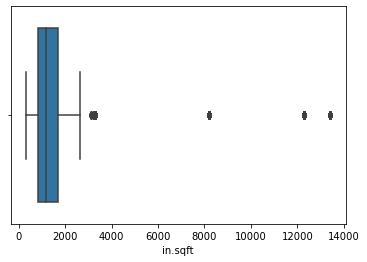

In [41]:
sns.boxplot(res_match['in.sqft'])
plt.show()

In [42]:
df_match.shape

(23021, 9)

In [43]:
#remove inf and zero
df_match=df_match[(df_match['unit.sqft']!=np.inf) & (df_match['unit.sqft']!=0)]
df_match.shape

(23020, 9)

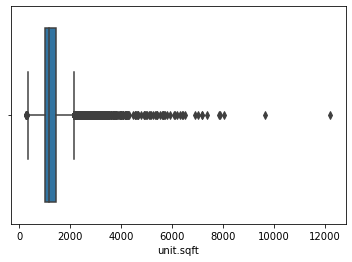

In [44]:
sns.boxplot(df_match['unit.sqft'])
plt.show()

In [45]:
res_match['in.sqft_bins'] = pd.qcut(res_match['in.sqft'], 12, duplicates='drop')
res_match['in.sqft_bins'].value_counts()

(853.0, 1138.0]      759
(617.0, 853.0]       548
(316.999, 617.0]     495
(1623.0, 1690.0]     453
(1138.0, 1202.0]     308
(2152.0, 2631.0]     273
(2631.0, 13414.0]    272
(1220.0, 1623.0]     215
(1690.0, 2152.0]     212
(1202.0, 1220.0]     201
Name: in.sqft_bins, dtype: int64

In [46]:
res_match.shape

(3736, 12)

In [47]:
df_match=df_match[df_match['unit.sqft'] <= 14000]

In [48]:
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,in.vintage_acs,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.geometry_garage,in.heating_fuel,in.sqft_bins
5,220,1220.0,1,None,1960-79,Single-Family Detached,G36004009,0.0,15.487365,None,Natural Gas,"(1202.0, 1220.0]"
9,460,1623.0,2,2,1960-79,Multi-Family with 2 - 4 Units,G36004014,0.0,7.450650,None,Natural Gas,"(1220.0, 1623.0]"
12,801,885.0,1,None,<1940,Single-Family Detached,G36004011,0.0,6.109456,None,Natural Gas,"(853.0, 1138.0]"
18,1073,1623.0,2,2,1940-59,Multi-Family with 2 - 4 Units,G36004016,0.0,3.708803,None,Natural Gas,"(1220.0, 1623.0]"
25,1280,617.0,2,2,<1940,Multi-Family with 2 - 4 Units,G36004016,0.0,12.082888,None,Natural Gas,"(316.999, 617.0]"


In [49]:
bin_edges = [0,617.0,853.0,1138.0,1202.0,1623.0,1675.0,1690.0,2176.0,2663.0,14000]
df_match['in.sqft_bins'] = pd.cut(df_match['unit.sqft'], bins=bin_edges)
res_match['in.sqft_bins']= pd.cut(res_match['in.sqft'], bins=bin_edges)

In [50]:
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,in.vintage_acs,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.geometry_garage,in.heating_fuel,in.sqft_bins
5,220,1220.0,1,None,1960-79,Single-Family Detached,G36004009,0.0,15.487365,None,Natural Gas,"(1202.0, 1623.0]"
9,460,1623.0,2,2,1960-79,Multi-Family with 2 - 4 Units,G36004014,0.0,7.450650,None,Natural Gas,"(1202.0, 1623.0]"
12,801,885.0,1,None,<1940,Single-Family Detached,G36004011,0.0,6.109456,None,Natural Gas,"(853.0, 1138.0]"
18,1073,1623.0,2,2,1940-59,Multi-Family with 2 - 4 Units,G36004016,0.0,3.708803,None,Natural Gas,"(1202.0, 1623.0]"
25,1280,617.0,2,2,<1940,Multi-Family with 2 - 4 Units,G36004016,0.0,12.082888,None,Natural Gas,"(0.0, 617.0]"


In [51]:
df_match.head()

,bbl,unit.sqft,numfloors,unitstotal,yearbuilt,GISJOIN,latitude,longitude,Block_Group,in.sqft_bins
0,4139210050,1386.0,2.00,1.0,1920.0,G36003212,40.636417,-73.741595,360810664001,"(1202.0, 1623.0]"
1,4139210040,788.0,2.50,1.0,1899.0,G36003212,40.635932,-73.742018,360810664001,"(617.0, 853.0]"
2,4139210044,875.0,1.75,1.0,1915.0,G36003212,40.636157,-73.741873,360810664001,"(853.0, 1138.0]"
3,4139210032,1174.0,1.50,1.0,1920.0,G36003212,40.635482,-73.742229,360810664001,"(1138.0, 1202.0]"
4,4139210030,1006.0,1.50,1.0,1920.0,G36003212,40.635375,-73.742283,360810664001,"(853.0, 1138.0]"


In [52]:
df_match['in.sqft_bins'].value_counts()

(853.0, 1138.0]      7294
(1202.0, 1623.0]     7141
(617.0, 853.0]       2295
(1138.0, 1202.0]     2125
(1690.0, 2176.0]     1999
(2176.0, 2663.0]      641
(0.0, 617.0]          491
(1623.0, 1675.0]      482
(2663.0, 14000.0]     407
(1675.0, 1690.0]      135
Name: in.sqft_bins, dtype: int64

#### 2) Age of building

In [53]:
bin_edges = [0,1940,1960,1980,2000,2010,2023]
df_match['year_bins'] = pd.cut(df_match['yearbuilt'], bins=bin_edges, labels=['<1940','1940-59','1960-79','1980-99','2000-09','2010s'])
df_match.head()

,bbl,unit.sqft,numfloors,unitstotal,yearbuilt,GISJOIN,latitude,longitude,Block_Group,in.sqft_bins,year_bins
0,4139210050,1386.0,2.00,1.0,1920.0,G36003212,40.636417,-73.741595,360810664001,"(1202.0, 1623.0]",<1940
1,4139210040,788.0,2.50,1.0,1899.0,G36003212,40.635932,-73.742018,360810664001,"(617.0, 853.0]",<1940
2,4139210044,875.0,1.75,1.0,1915.0,G36003212,40.636157,-73.741873,360810664001,"(853.0, 1138.0]",<1940
3,4139210032,1174.0,1.50,1.0,1920.0,G36003212,40.635482,-73.742229,360810664001,"(1138.0, 1202.0]",<1940
4,4139210030,1006.0,1.50,1.0,1920.0,G36003212,40.635375,-73.742283,360810664001,"(853.0, 1138.0]",<1940


In [54]:
res_match = res_match.rename(columns={'in.vintage_acs': 'year_bins'})

In [55]:
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,year_bins,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.geometry_garage,in.heating_fuel,in.sqft_bins
5,220,1220.0,1,None,1960-79,Single-Family Detached,G36004009,0.0,15.487365,None,Natural Gas,"(1202.0, 1623.0]"
9,460,1623.0,2,2,1960-79,Multi-Family with 2 - 4 Units,G36004014,0.0,7.450650,None,Natural Gas,"(1202.0, 1623.0]"
12,801,885.0,1,None,<1940,Single-Family Detached,G36004011,0.0,6.109456,None,Natural Gas,"(853.0, 1138.0]"
18,1073,1623.0,2,2,1940-59,Multi-Family with 2 - 4 Units,G36004016,0.0,3.708803,None,Natural Gas,"(1202.0, 1623.0]"
25,1280,617.0,2,2,<1940,Multi-Family with 2 - 4 Units,G36004016,0.0,12.082888,None,Natural Gas,"(0.0, 617.0]"


#### 3) Number of Units

In [56]:
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,year_bins,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.geometry_garage,in.heating_fuel,in.sqft_bins
5,220,1220.0,1,None,1960-79,Single-Family Detached,G36004009,0.0,15.487365,None,Natural Gas,"(1202.0, 1623.0]"
9,460,1623.0,2,2,1960-79,Multi-Family with 2 - 4 Units,G36004014,0.0,7.450650,None,Natural Gas,"(1202.0, 1623.0]"
12,801,885.0,1,None,<1940,Single-Family Detached,G36004011,0.0,6.109456,None,Natural Gas,"(853.0, 1138.0]"
18,1073,1623.0,2,2,1940-59,Multi-Family with 2 - 4 Units,G36004016,0.0,3.708803,None,Natural Gas,"(1202.0, 1623.0]"
25,1280,617.0,2,2,<1940,Multi-Family with 2 - 4 Units,G36004016,0.0,12.082888,None,Natural Gas,"(0.0, 617.0]"


In [57]:
res_match["in.geometry_building_number_units_mf"].value_counts()

2       1875
None    1861
Name: in.geometry_building_number_units_mf, dtype: int64

In [58]:
res_match["in.geometry_building_number_units_mf"]=res_match["in.geometry_building_number_units_mf"].replace("None","1")

In [59]:
res_match["in.geometry_building_number_units_mf"]=res_match["in.geometry_building_number_units_mf"].astype(float)

In [60]:
df_match["unitstotal"].value_counts()

1.0    13199
2.0     9811
Name: unitstotal, dtype: int64

In [61]:
res_match["in.geometry_building_number_units_mf"].value_counts()

2.0    1875
1.0    1861
Name: in.geometry_building_number_units_mf, dtype: int64

#### 4) Floors

In [62]:
res_match['floors_bins'] = pd.qcut(res_match['in.geometry_stories'], 10, duplicates='drop')
res_match['floors_bins'].value_counts()

(0.999, 2.0]    3617
(2.0, 3.0]       119
Name: floors_bins, dtype: int64

In [63]:
df_match['floors_bins'] = pd.qcut(df_match['numfloors'], 3, duplicates='drop')
df_match['floors_bins'].value_counts()

(0.999, 2.0]    19035
(2.0, 3.75]      3962
Name: floors_bins, dtype: int64

In [64]:
res_match['in.geometry_stories'].value_counts()

2    2354
1    1263
3     119
Name: in.geometry_stories, dtype: int64

In [65]:
df_match.head()

,bbl,unit.sqft,numfloors,unitstotal,yearbuilt,GISJOIN,latitude,longitude,Block_Group,in.sqft_bins,year_bins,floors_bins
0,4139210050,1386.0,2.00,1.0,1920.0,G36003212,40.636417,-73.741595,360810664001,"(1202.0, 1623.0]",<1940,"(0.999, 2.0]"
1,4139210040,788.0,2.50,1.0,1899.0,G36003212,40.635932,-73.742018,360810664001,"(617.0, 853.0]",<1940,"(2.0, 3.75]"
2,4139210044,875.0,1.75,1.0,1915.0,G36003212,40.636157,-73.741873,360810664001,"(853.0, 1138.0]",<1940,"(0.999, 2.0]"
3,4139210032,1174.0,1.50,1.0,1920.0,G36003212,40.635482,-73.742229,360810664001,"(1138.0, 1202.0]",<1940,"(0.999, 2.0]"
4,4139210030,1006.0,1.50,1.0,1920.0,G36003212,40.635375,-73.742283,360810664001,"(853.0, 1138.0]",<1940,"(0.999, 2.0]"


In [66]:
df_match['numfloors'].max()

3.75

In [67]:
bin_edges = [0,1.99,5]
df_match['floors_bins'] = pd.cut(df_match['numfloors'], bins=bin_edges, labels=['<2','>2'])
res_match['floors_bins'] = pd.cut(res_match['in.geometry_stories'], bins=bin_edges, labels=['<2','>2'])
df_match.head()

,bbl,unit.sqft,numfloors,unitstotal,yearbuilt,GISJOIN,latitude,longitude,Block_Group,in.sqft_bins,year_bins,floors_bins
0,4139210050,1386.0,2.00,1.0,1920.0,G36003212,40.636417,-73.741595,360810664001,"(1202.0, 1623.0]",<1940,>2
1,4139210040,788.0,2.50,1.0,1899.0,G36003212,40.635932,-73.742018,360810664001,"(617.0, 853.0]",<1940,>2
2,4139210044,875.0,1.75,1.0,1915.0,G36003212,40.636157,-73.741873,360810664001,"(853.0, 1138.0]",<1940,<2
3,4139210032,1174.0,1.50,1.0,1920.0,G36003212,40.635482,-73.742229,360810664001,"(1138.0, 1202.0]",<1940,<2
4,4139210030,1006.0,1.50,1.0,1920.0,G36003212,40.635375,-73.742283,360810664001,"(853.0, 1138.0]",<1940,<2


In [68]:
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,year_bins,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.geometry_garage,in.heating_fuel,in.sqft_bins,floors_bins
5,220,1220.0,1,1.0,1960-79,Single-Family Detached,G36004009,0.0,15.487365,None,Natural Gas,"(1202.0, 1623.0]",<2
9,460,1623.0,2,2.0,1960-79,Multi-Family with 2 - 4 Units,G36004014,0.0,7.450650,None,Natural Gas,"(1202.0, 1623.0]",>2
12,801,885.0,1,1.0,<1940,Single-Family Detached,G36004011,0.0,6.109456,None,Natural Gas,"(853.0, 1138.0]",<2
18,1073,1623.0,2,2.0,1940-59,Multi-Family with 2 - 4 Units,G36004016,0.0,3.708803,None,Natural Gas,"(1202.0, 1623.0]",>2
25,1280,617.0,2,2.0,<1940,Multi-Family with 2 - 4 Units,G36004016,0.0,12.082888,None,Natural Gas,"(0.0, 617.0]",>2


In [69]:
res_match = res_match.rename(columns={'in.puma': 'Puma', 'in.geometry_building_number_units_mf': 'no_units'})
df_match = df_match.rename(columns={'GISJOIN': 'Puma', 'unitstotal': 'no_units'})

In [70]:
df_match.shape

(23010, 12)

In [71]:
#df_match.reset_index(inplace=True)
#df_match.head()

In [72]:
#df_match['index'].nunique()

### Merging Dataframes

In [73]:
res_plu = pd.merge(df_match, res_match, on=['Puma', 'year_bins', 'in.sqft_bins', 'no_units', 'floors_bins'],how='inner')
res_plu.head()

,bbl,unit.sqft,numfloors,no_units,yearbuilt,Puma,latitude,longitude,Block_Group,in.sqft_bins,year_bins,floors_bins,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_type_recs,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.geometry_garage,in.heating_fuel
0,4139120183,924.0,1.0,1.0,1930.0,G36004105,40.637573,-73.745572,360810664001,"(853.0, 1138.0]",<1940,<2,97920,885.0,1,Single-Family Detached,0.000000,8.950424,None,Natural Gas
1,4139120183,924.0,1.0,1.0,1930.0,G36004105,40.637573,-73.745572,360810664001,"(853.0, 1138.0]",<1940,<2,141433,885.0,1,Single-Family Detached,2.028317,13.250455,None,Natural Gas
2,4139120183,924.0,1.0,1.0,1930.0,G36004105,40.637573,-73.745572,360810664001,"(853.0, 1138.0]",<1940,<2,535418,885.0,1,Single-Family Detached,0.000000,9.004402,None,Electricity
3,4139110105,1050.0,1.5,1.0,1925.0,G36004105,40.637096,-73.746810,360810664001,"(853.0, 1138.0]",<1940,<2,97920,885.0,1,Single-Family Detached,0.000000,8.950424,None,Natural Gas
4,4139110105,1050.0,1.5,1.0,1925.0,G36004105,40.637096,-73.746810,360810664001,"(853.0, 1138.0]",<1940,<2,141433,885.0,1,Single-Family Detached,2.028317,13.250455,None,Natural Gas


### How many load profiles were matched to each building?

In [78]:
grouped = res_plu.groupby('bbl')['bldg_id'].apply(list)
grouped = grouped.reset_index()
grouped['num_bldg_ids'] = grouped['bldg_id'].apply(lambda x: len(x))
grouped.head()

,bbl,bldg_id,num_bldg_ids
0,4123100076,"[19444, 334917, 395521, 413604]",4
1,4123100077,[440019],1
2,4123120036,[448038],1
3,4123120044,"[159588, 220720, 547059]",3
4,4123120045,"[353104, 405740]",2


In [79]:
grouped['num_bldg_ids'].max()

10

In [81]:
grouped.shape

(16813, 3)

In [83]:
#grouped.to_csv("bbl_bldg_num.csv")

In [84]:
grouped["num_bldg_ids"].value_counts()

3     3465
4     3394
1     3190
5     3021
2     1431
7      928
10     812
6      287
9      285
Name: num_bldg_ids, dtype: int64